## Create a regression dataset using scikit learn


In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_regression
X, Y = make_regression(n_samples=3000, n_features=30, 
                       n_informative=28, noise=10, random_state=42)

In [3]:
X

array([[-0.71827942, -0.07007371, -2.8807235 , ...,  0.55875312,
        -0.87841759, -0.31143446],
       [-0.12946552,  0.4509102 , -0.22386779, ...,  0.47038416,
        -2.21539143,  1.3816385 ],
       [ 0.24136957,  1.13337657,  0.07615875, ..., -0.92070334,
         0.20400935,  0.85537708],
       ...,
       [ 1.56947425, -0.98543931, -0.68558038, ...,  0.19199239,
         0.47005926,  0.50240498],
       [ 0.696168  ,  1.64337816, -0.08809124, ...,  0.75109945,
        -1.97548777, -2.06508305],
       [ 0.17293044,  1.05127132, -0.55991632, ..., -0.04062406,
        -0.44272303,  1.14910819]])

In [4]:
X.shape

(3000, 30)

In [5]:
Y

array([ -45.03468463, -253.02652499,  496.76697472, ...,  207.02333227,
       -828.35114667,  -98.9642237 ])

### Converting X and Y to a dataframe

In [6]:
cols = [f'x{i+1}' for i in range(30)]
cols

['x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x21',
 'x22',
 'x23',
 'x24',
 'x25',
 'x26',
 'x27',
 'x28',
 'x29',
 'x30']

In [7]:
import pandas as pd 
X = pd.DataFrame(X, columns=cols)
X.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
0,-0.718279,-0.070074,-2.880723,-0.291797,-1.279408,0.360495,-2.030042,-0.426785,0.442853,0.112514,...,-1.379176,0.545999,-1.238762,0.210254,2.233469,0.501408,0.311878,0.558753,-0.878418,-0.311434
1,-0.129466,0.450910,-0.223868,-1.127200,-0.765647,-0.194988,-0.887412,0.706774,-0.341742,0.092110,...,0.767348,-1.111131,-1.120872,-0.434288,0.826882,-0.244658,0.296457,0.470384,-2.215391,1.381639
2,0.241370,1.133377,0.076159,-0.597106,-0.569812,-1.097820,-0.405152,0.360265,0.296881,-0.184067,...,-0.519368,1.398581,1.022523,-0.081239,0.339850,1.128266,1.101489,-0.920703,0.204009,0.855377
3,-0.066140,1.154356,0.065168,0.251785,-0.178338,-1.304646,-1.776299,-1.545955,-1.463394,-0.137389,...,0.376657,1.021651,1.064456,-1.066433,-1.620960,1.388090,1.764874,-0.946784,-0.095042,1.812141
4,0.630665,-1.333967,-0.606582,1.170996,1.342460,-1.284969,1.374057,-1.007511,-0.323503,0.265850,...,-0.500754,0.169756,0.967334,0.028729,0.757923,0.563454,0.625839,0.074512,-0.593699,-0.572639


In [8]:
Y = pd.DataFrame(Y, columns=['y'])
Y.head()

,y
0,-45.034685
1,-253.026525
2,496.766975
3,-4.601647
4,236.457790


### Create a scikit learn pipeline for X

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [10]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [11]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
0,-0.688919,-0.057155,-2.863120,-0.305510,-1.275101,0.352911,-1.974449,-0.412523,0.431024,0.109518,...,-1.402585,0.574088,-1.226719,0.191083,2.186029,0.475576,0.347794,0.578474,-0.918601,-0.325387
1,-0.105807,0.470406,-0.205413,-1.147154,-0.763248,-0.201377,-0.849465,0.716442,-0.367298,0.090012,...,0.772182,-1.104212,-1.110130,-0.448803,0.802196,-0.276927,0.332451,0.489438,-2.268167,1.395733
2,0.261436,1.161488,0.094710,-0.613100,-0.568141,-1.102267,-0.374652,0.371337,0.282499,-0.174010,...,-0.531464,1.437562,1.009621,-0.098304,0.323041,1.107841,1.133389,-0.912149,0.174020,0.860754
3,-0.043094,1.182733,0.083716,0.242134,-0.178121,-1.308648,-1.724625,-1.527157,-1.508573,-0.129386,...,0.376350,1.055817,1.051092,-1.076381,-1.606051,1.369906,1.793399,-0.938426,-0.127848,1.833367
4,0.646962,-1.337003,-0.588250,1.168212,1.337030,-1.289013,1.377081,-0.990895,-0.348739,0.256105,...,-0.512606,0.193039,0.955041,0.010869,0.734352,0.538156,0.660157,0.090578,-0.631202,-0.590918


### Apply train test split

In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=21)

In [13]:
xtrain.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
1643,0.052039,-0.940475,-0.943021,-0.987331,1.090220,1.585467,-0.678379,-1.139013,-0.171146,-1.170170,...,0.922744,0.526633,0.016138,0.607965,0.333314,-1.520318,0.257526,-0.046280,0.278598,0.122691
137,1.253791,-0.710742,-1.791321,1.539163,-1.114221,1.012629,0.244713,-1.926104,-0.445870,-0.629977,...,-1.077994,-0.744548,-1.040224,0.435301,-0.454281,1.101016,-0.416873,-0.970135,-0.663722,0.115474
1205,0.252961,-0.020081,-0.787437,1.481952,-0.891972,0.763080,0.103481,-0.422697,-0.032422,-0.897198,...,-0.213005,-0.275669,0.743194,-0.255197,-0.662567,-0.740384,1.096108,2.044021,-1.143672,0.657581
523,0.522782,-0.644630,-0.164250,-0.473433,1.297058,1.305110,0.098092,-0.510435,1.836239,0.641412,...,-0.738259,1.205840,1.346459,0.796726,1.464666,1.285444,-0.318203,1.055037,1.077651,-0.034905
1493,-0.257471,0.131504,-0.411423,0.237039,1.631228,1.070852,-1.716534,-1.038329,0.608915,0.980584,...,-1.106273,-0.672314,-0.409232,-0.574227,-0.049304,-1.098888,0.582422,-1.028832,1.017513,1.018863


In [14]:
ytrain.head()

,y
1643,112.433915
137,-1083.527732
1205,-128.674183
523,761.187440
1493,-172.902429


In [15]:
xtest.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
465,-0.169150,0.409952,1.307803,0.700982,-0.022220,-0.114715,-0.166075,1.478153,-0.395357,-0.013553,...,-0.833916,1.384411,0.676108,-0.296128,-0.309297,0.556642,0.432878,-0.163328,-1.799377,0.075014
904,0.637073,-1.927265,1.005873,0.295788,-1.197994,1.168578,-0.009949,-1.740025,-0.893787,-1.032446,...,0.375229,0.321581,1.098016,-2.367612,-2.161798,0.942354,0.164110,-0.625070,1.951268,-0.588490
2639,1.505908,0.342662,1.049776,0.563217,1.272666,0.319483,-0.145469,0.724367,-0.875059,1.157968,...,-0.361983,-0.488970,1.633057,-0.719981,-0.043802,0.555418,1.668127,1.919041,-0.105455,0.233323
2125,0.700346,2.323657,-0.405742,-0.849900,0.199404,-0.194465,-0.126883,-0.110462,2.882282,0.295011,...,-0.451245,0.431099,-0.411627,0.764152,1.172289,-0.002425,-0.254325,-2.008459,0.353949,0.749569
1962,0.222637,0.279963,-1.257113,0.583550,-0.564966,-1.512064,0.678992,-2.255414,1.393263,0.905597,...,-0.992292,-0.802682,0.288486,-0.037195,-0.669431,0.305328,-1.311686,-1.082929,1.749682,-1.388976


In [16]:
ytest.head()

,y
465,-153.360317
904,-827.315745
2639,715.436126
2125,528.030227
1962,-44.600383


### Build a Neural network

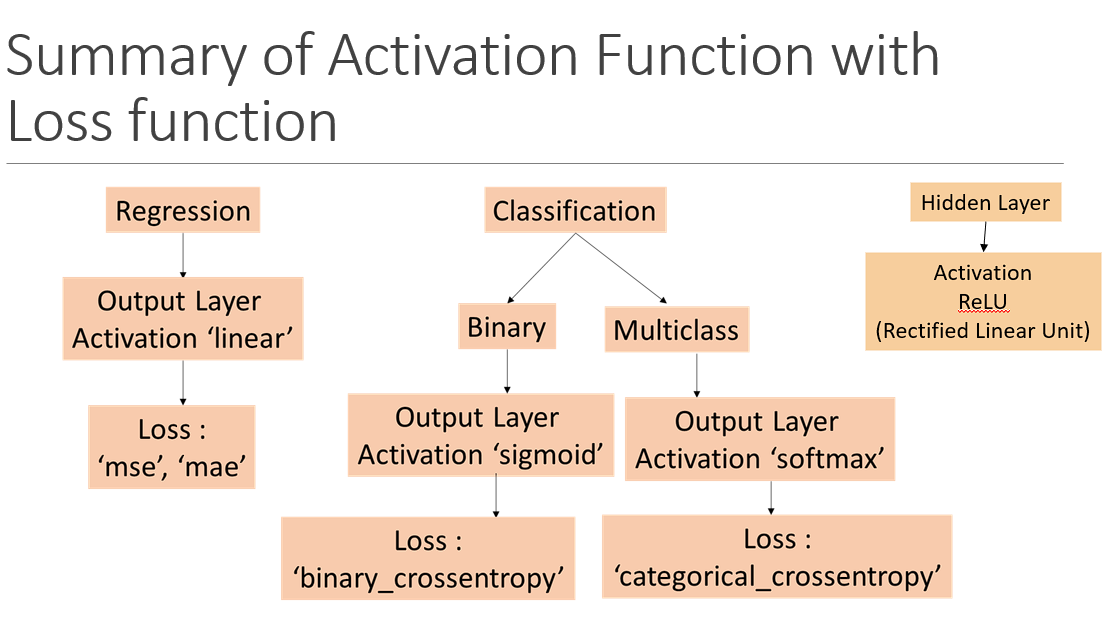

In [17]:
xtrain.shape

(2400, 30)

In [18]:
xtrain.shape[1]

30

In [19]:
from keras.models import Sequential 
from keras.layers import Dense

In [20]:
# Initialize the neural network
model = Sequential()

# Create hidden layer 1
model.add(Dense(units=64, activation='relu', input_shape=(xtrain.shape[1],)))
# Create 2nd hidden layer with 32
model.add(Dense(units=32, activation='relu'))
# Create a output layer
model.add(Dense(units=1, activation='linear'))

### Compiling the model

In [21]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [22]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=100)

Epoch 1/100


60/60 [==============================] - 2s 6ms/step - loss: 112327.7500 - mae: 265.3782 - val_loss: 115116.1484 - val_mae: 271.1393
Epoch 2/100
60/60 [==============================] - 0s 2ms/step - loss: 109279.6016 - mae: 261.5522 - val_loss: 108980.7109 - val_mae: 263.5742
Epoch 3/100
60/60 [==============================] - 0s 2ms/step - loss: 97564.2109 - mae: 246.3568 - val_loss: 89941.3047 - val_mae: 238.2485
Epoch 4/100
60/60 [==============================] - 0s 3ms/step - loss: 71235.4531 - mae: 207.3913 - val_loss: 55754.4219 - val_mae: 184.3103
Epoch 5/100
60/60 [==============================] - 0s 3ms/step - loss: 36086.6523 - mae: 140.7733 - val_loss: 21478.4922 - val_mae: 108.7956
Epoch 6/100
60/60 [==============================] - 0s 2ms/step - loss: 11090.0381 - mae: 73.0727 - val_loss: 5303.6904 - val_mae: 50.4745
Epoch 7/100
60/60 [==============================] - 0s 3ms/step - loss: 2988.9385 - mae: 39.3268 - val_loss: 1961.5546 - val_mae: 32.8116


### Evaluate the model

In [24]:
model.evaluate(xtrain, ytrain)

75/75 [==============================] - 0s 2ms/step - loss: 73.6664 - mae: 6.4735


[73.66637420654297, 6.473479270935059]

In [25]:
model.evaluate(xtest, ytest)

19/19 [==============================] - 0s 2ms/step - loss: 153.8974 - mae: 9.6780


[153.89736938476562, 9.677959442138672]

### Predicting values for train and test

In [26]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

19/19 [==============================] - 0s 1ms/step


In [27]:
ypred_tr[0:5]

array([[  118.64344 ],
       [-1059.0885  ],
       [ -121.449615],
       [  759.9659  ],
       [ -180.44818 ]], dtype=float32)

In [28]:
ytrain.head()

,y
1643,112.433915
137,-1083.527732
1205,-128.674183
523,761.187440
1493,-172.902429


In [29]:
ypred_ts[0:5]

array([[-142.18452],
       [-832.0281 ],
       [ 716.14154],
       [ 516.0691 ],
       [ -49.74437]], dtype=float32)

In [30]:
ytest.head()

,y
465,-153.360317
904,-827.315745
2639,715.436126
2125,528.030227
1962,-44.600383


### Calculating R2 score in train and test

In [32]:
from sklearn.metrics import r2_score

In [33]:
tr_r2 = r2_score(ytrain, ypred_tr)
tr_r2

0.9993509651154475

In [34]:
ts_r2 = r2_score(ytest, ypred_ts)
ts_r2

0.9987060470384352

### Saving the neural network model for given dataset

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1984      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4097 (16.00 KB)
Trainable params: 4097 (16.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
model.save('Regression.keras')

### Loading the model

In [37]:
from keras.models import load_model
nn = load_model('Regression.keras')
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1984      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4097 (16.00 KB)
Trainable params: 4097 (16.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
